In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## **Preproccesing**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [24]:
for index, row in df.iterrows():
  sum = df.iloc[index]['Units Sold']*df.iloc[index]['Unit Price']
  if sum != df.iloc[index]['Total Revenue']:
    df.iloc[index]['Total Revenue'] = sum

<ipython-input-24-f1579849b301>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[index]['Total Revenue'] = sum


In [28]:
for var in df.columns:

    print(df[var].value_counts())

Transaction ID
10001    1
10002    1
10153    1
10154    1
10155    1
        ..
10085    1
10086    1
10087    1
10088    1
10240    1
Name: count, Length: 240, dtype: int64
Date
2024-01-01    1
2024-01-02    1
2024-06-01    1
2024-06-02    1
2024-06-03    1
             ..
2024-03-25    1
2024-03-26    1
2024-03-27    1
2024-03-28    1
2024-08-27    1
Name: count, Length: 240, dtype: int64
Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64
Product Name
Dyson Supersonic Hair Dryer                         2
The Girl with the Dragon Tattoo by Stieg Larsson    2
Keurig K-Elite Coffee Maker                         2
The Silent Patient by Alex Michaelides              2
Dune by Frank Herbert                               2
                                                   ..
LG OLED TV                                          1
Uniqlo Ultra Light Down Jacket         

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


## **Save File**

In [33]:
df.to_csv('preprocessed_data.csv', index=False)

## **Visualization**

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

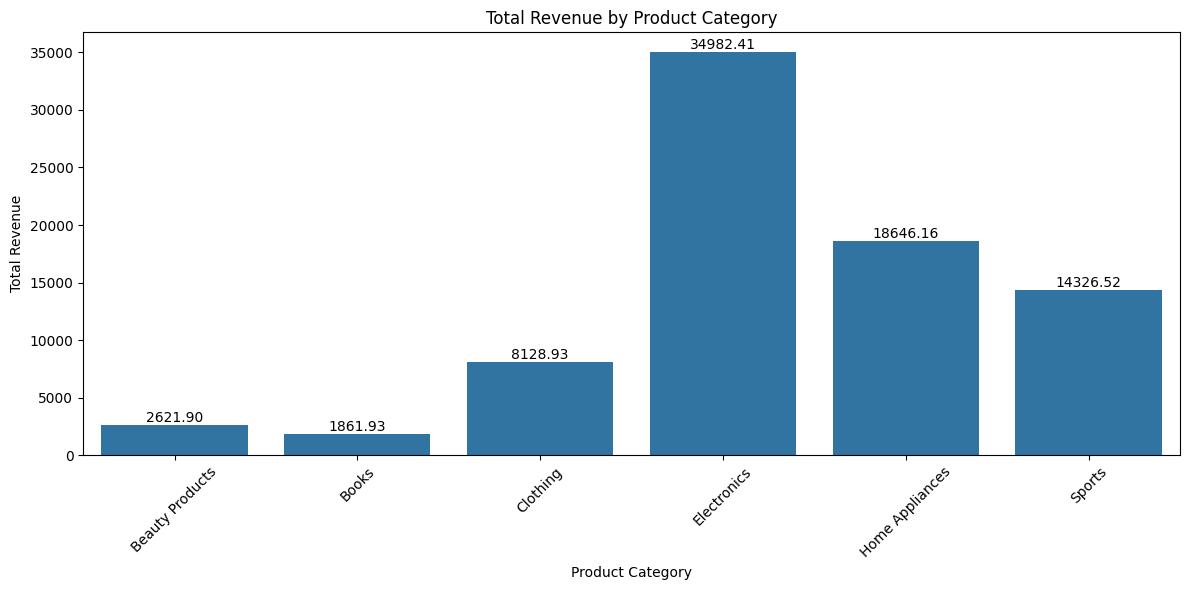

In [49]:
aggregated_data = df.groupby('Product Category', as_index=False)['Total Revenue'].sum()

# Set the figure size to make the x-axis wider
plt.figure(figsize=(12, 6))

# Create a bar plot using the aggregated data
sns.barplot(x='Product Category', y='Total Revenue', data=aggregated_data)

for i, value in enumerate(aggregated_data['Total Revenue']):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45)

# Show the plot
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.tight_layout()
plt.show()

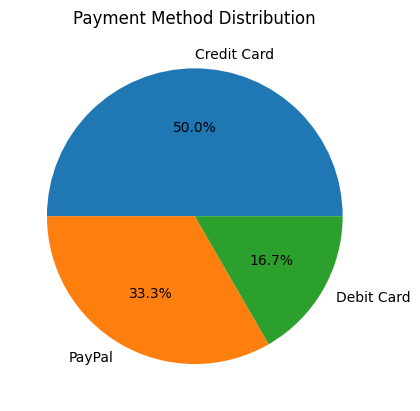

In [51]:
plt.pie(df['Payment Method'].value_counts(), labels=df['Payment Method'].value_counts().index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()

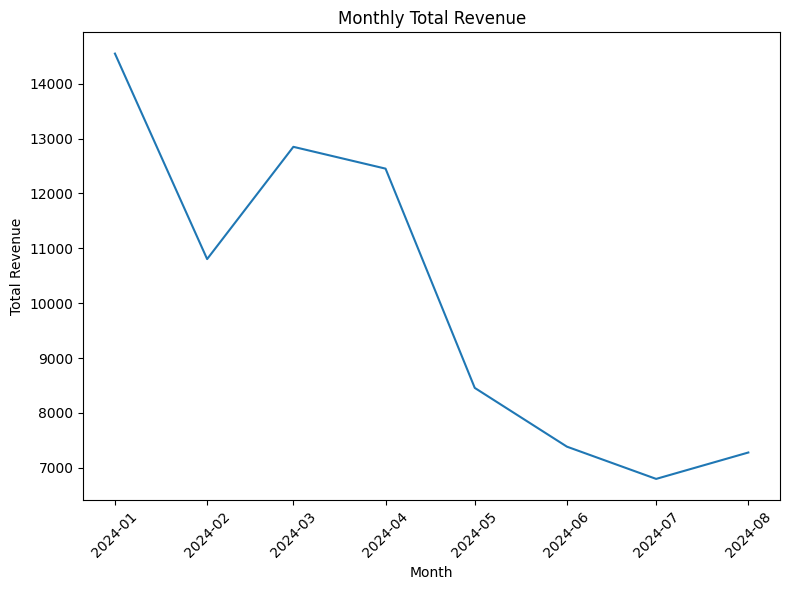

In [54]:
df['Month'] = df['Date'].dt.to_period('M')

# Aggregate data by month, summing 'Total Revenue'
monthly_data = df.groupby('Month', as_index=False)['Total Revenue'].sum()

# Convert 'Month' to a datetime object for better plotting
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a line plot with monthly total revenue
sns.lineplot(x='Month', y='Total Revenue', data=monthly_data)

# Format x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue')
plt.tight_layout()
plt.show()